# Handle Data
Getting stats on our data, and splitting into train-test-eval

In [72]:
import os
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
import random
import torchaudio

from dotenv import load_dotenv

load_dotenv()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/jimbo/Documents/coding/misc/audio-deepfake-detection/venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/jimbo/Documents/coding/misc/audio-deepfake-detection/venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/jimbo/Documents/coding/misc/audio-deepfake-detect

True

In [13]:
meta_path = 'data_meta.csv'
data_dir = os.getenv('DATA_DIR')

meta = pd.read_csv(meta_path)

## Data Stats

In [6]:
# total samples
len(meta)

31779

In [7]:
# samples by label
meta['label'].value_counts()

label
bona-fide    19963
spoof        11816
Name: count, dtype: int64

In [33]:
# length of samples
lengths = []

def get_wav_length(file_path):
    with sf.SoundFile(file_path) as f:
        frames = len(f)
        rate = f.samplerate
        duration = frames / float(rate)
        return duration

for i, file in enumerate(sorted(os.listdir(data_dir))):

    if file.endswith('.wav'):

        length = get_wav_length(os.path.join(data_dir, file))
        
        print(f'file: {file}, length: {length}')

        lengths.append(length)

        # update meta
        meta.loc[meta['file'] == file, 'length (sec)'] = length

file: 0.wav, length: 1.8190625
file: 1.wav, length: 11.0960625
file: 10.wav, length: 8.2990625
file: 100.wav, length: 2.884
file: 1000.wav, length: 2.3390625
file: 10000.wav, length: 5.8570625
file: 10001.wav, length: 6.33
file: 10002.wav, length: 10.569
file: 10003.wav, length: 1.888
file: 10004.wav, length: 8.43
file: 10005.wav, length: 7.602
file: 10006.wav, length: 2.309
file: 10007.wav, length: 2.8
file: 10008.wav, length: 16.9690625
file: 10009.wav, length: 4.155
file: 1001.wav, length: 4.541
file: 10010.wav, length: 1.5930625
file: 10011.wav, length: 3.462
file: 10012.wav, length: 3.0970625
file: 10013.wav, length: 2.794
file: 10014.wav, length: 13.0520625
file: 10015.wav, length: 4.1840625
file: 10016.wav, length: 1.4710625
file: 10017.wav, length: 9.89
file: 10018.wav, length: 2.0750625
file: 10019.wav, length: 4.5160625
file: 1002.wav, length: 5.481
file: 10020.wav, length: 6.8720625
file: 10021.wav, length: 8.15
file: 10022.wav, length: 2.7660625
file: 10023.wav, length: 3.3

In [35]:
# save meta with lengths
meta.to_csv(meta_path, index=False)

In [73]:
# get the sample rates
sample_rates = []

for i, file in enumerate(sorted(os.listdir(data_dir))):

    if file.endswith('.wav'):

        file_path = os.path.join(data_dir, file)

        waveform, sample_rate = torchaudio.load(file_path)

        print(f'file: {file}, sample rate: {sample_rate}')

        sample_rates.append(sample_rate)

file: 1.wav, sample rate: 16000
file: 10.wav, sample rate: 16000
file: 100.wav, sample rate: 16000
file: 1000.wav, sample rate: 16000
file: 10000.wav, sample rate: 16000
file: 10001.wav, sample rate: 16000
file: 10002.wav, sample rate: 16000
file: 10003.wav, sample rate: 16000
file: 10004.wav, sample rate: 16000
file: 10005.wav, sample rate: 16000
file: 10006.wav, sample rate: 16000
file: 10007.wav, sample rate: 16000
file: 10008.wav, sample rate: 16000
file: 10009.wav, sample rate: 16000
file: 1001.wav, sample rate: 16000
file: 10010.wav, sample rate: 16000
file: 10011.wav, sample rate: 16000
file: 10012.wav, sample rate: 16000
file: 10013.wav, sample rate: 16000
file: 10014.wav, sample rate: 16000
file: 10015.wav, sample rate: 16000
file: 10016.wav, sample rate: 16000
file: 10017.wav, sample rate: 16000
file: 10018.wav, sample rate: 16000
file: 10019.wav, sample rate: 16000
file: 1002.wav, sample rate: 16000
file: 10020.wav, sample rate: 16000
file: 10021.wav, sample rate: 16000
file

In [77]:
set(sample_rates)

{16000}

In [9]:
# get the average length
sum(lengths) / len(lengths)

4.287800174643618

In [10]:
# get the min and max length
min(lengths), max(lengths)

(0.4380625, 24.991)

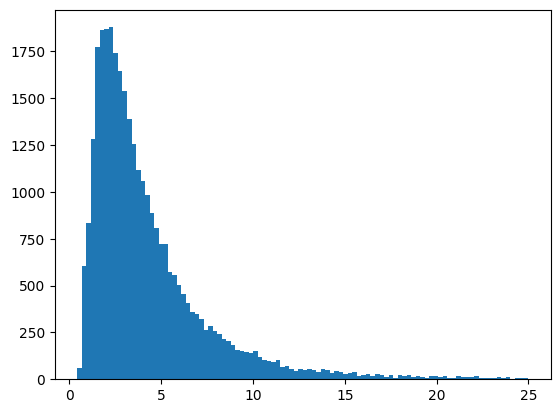

In [11]:
# plot the length distribution
plt.hist(lengths, bins=100)
plt.show()

In [21]:
# num of unique speakers
len(meta['speaker'].unique())

54

In [29]:
# identify our evaluation speaker
meta[meta['speaker'] == 'Alec Guinness']['label'].value_counts()

label
bona-fide    1907
spoof        1718
Name: count, dtype: int64

## Split data

In [ ]:
# get our evaluation set metadata
eval_meta = meta[meta['speaker'] == 'Alec Guinness']

In [ ]:
# get our non-evaluation set metadata
non_eval_meta = meta[meta['speaker'] != 'Alec Guinness']

In [ ]:
len(non_eval_meta)

28154

In [48]:
non_eval_meta['label'].value_counts()

label
bona-fide    18056
spoof        10098
Name: count, dtype: int64

In [57]:
train_speakers = []
test_speakers = []

# iterate through the non-evaluation set and split into train and test speakers
# go through in order of most-frequent to least-frequent -- to try to keep the distribution
for speaker, value in dict(non_eval_meta['speaker'].value_counts()).items():
    
    # 80% probability 
    if random.random() < 0.8:
        train_speakers.append(speaker)
    else:
        test_speakers.append(speaker)

In [63]:
train_meta = non_eval_meta[non_eval_meta['speaker'].isin(train_speakers)]
test_meta = non_eval_meta[non_eval_meta['speaker'].isin(test_speakers)]

In [68]:
print(len(train_meta))
train_meta['label'].value_counts()

20738


label
bona-fide    12745
spoof         7993
Name: count, dtype: int64

In [69]:
print(len(test_meta))
test_meta['label'].value_counts()

7416


label
bona-fide    5311
spoof        2105
Name: count, dtype: int64

In [71]:
# save train, test, and eval
train_meta.to_csv('train_meta.csv', index=False)
test_meta.to_csv('test_meta.csv', index=False)
eval_meta.to_csv('eval_meta.csv', index=False)